<a href="https://colab.research.google.com/github/rajni0829/DataScience/blob/main/EDA_on_Netflix_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd  # preparaing data
import plotly.express as px   # data visualization
from textblob import TextBlob  # sentiment analysis

data = pd.read_csv('/content/drive/MyDrive/NetFlix_Dataset/netflix_titles.csv')



In [2]:
data.shape

(8807, 12)

In [9]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [3]:
data.head

<bound method NDFrame.head of      show_id  ...                                        description
0         s1  ...  As her father nears the end of his life, filmm...
1         s2  ...  After crossing paths at a party, a Cape Town t...
2         s3  ...  To protect his family from a powerful drug lor...
3         s4  ...  Feuds, flirtations and toilet talk go down amo...
4         s5  ...  In a city of coaching centers known to train I...
...      ...  ...                                                ...
8802   s8803  ...  A political cartoonist, a crime reporter and a...
8803   s8804  ...  While living alone in a spooky town, a young g...
8804   s8805  ...  Looking to survive in a world taken over by zo...
8805   s8806  ...  Dragged from civilian life, a former superhero...
8806   s8807  ...  A scrappy but poor boy worms his way into a ty...

[8807 rows x 12 columns]>

In [11]:
# Finding if the dataset contains null values
data.isnull().sum()
 

show_id           0
type              0
title             0
director          0
cast            825
country         831
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
description       0
dtype: int64

In [12]:
# Cleaning data
data = data.dropna( how='any',subset=['cast', 'director'])


In [14]:
df = pd.read_csv('/content/drive/MyDrive/NetFlix_Dataset/netflix_titles.csv')

# Replacing null values with ‘missing’
df['country'].fillna('Missing',inplace=True)
df['date_added'].fillna('Missing',inplace=True)
df['rating'].fillna('Missing',inplace=True)
df.isnull().sum().sum()

3462

In [4]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
# Creating Pie Chart
z = data.groupby(['rating']).size().reset_index(name='counts')
piechart = px.pie(z,values='counts',names='rating',title='Distribution')
piechart.show()

In [7]:
z

,rating,counts
0,66 min,1
1,74 min,1
2,84 min,1
3,G,41
4,NC-17,3
5,NR,80
6,PG,287
7,PG-13,490
8,R,799
9,TV-14,2160


In [10]:
# Top 5 Actors and Directors

data['director'] = data['director'].fillna("No director specified")
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No director specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No director specified,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No director specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,No director specified,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


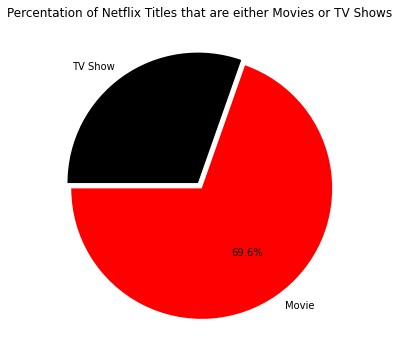

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.title("Percentation of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(df.type.value_counts(),explode=(0.025,0.025), labels=df.type.value_counts().index, colors=['red','black'],autopct='%1.1f%%', startangle=180)
plt.show()

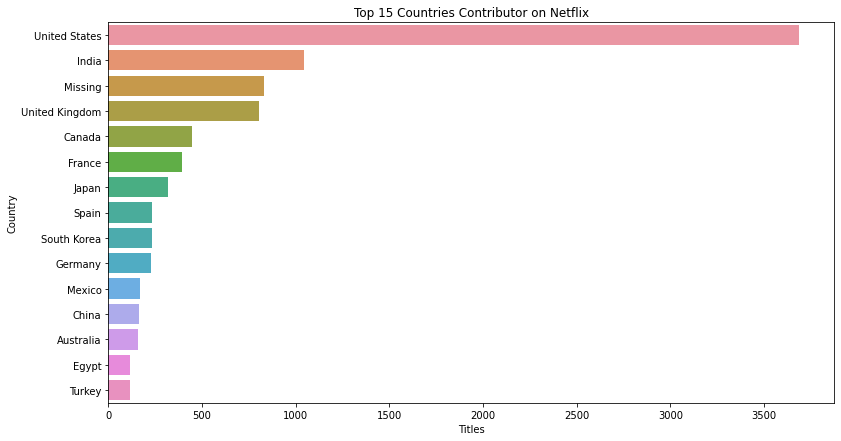

In [33]:
filtered_countries = df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']
plt.figure(figsize=(13,7))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:15])
plt.title('Top 15 Countries Contributor on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

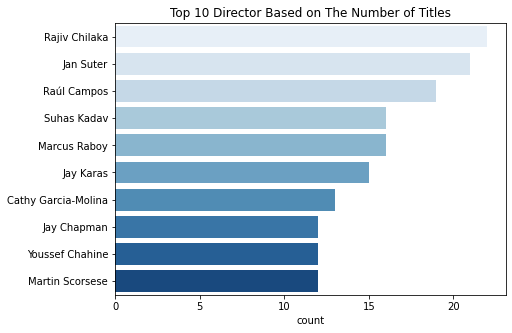

In [37]:
filtered_directors = df[df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(7,5))
plt.title('Top 10 Director Based on The Number of Titles')
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='Blues')
plt.show()

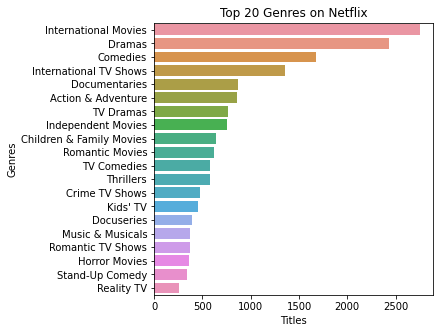

In [36]:
filtered_genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(5,5))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

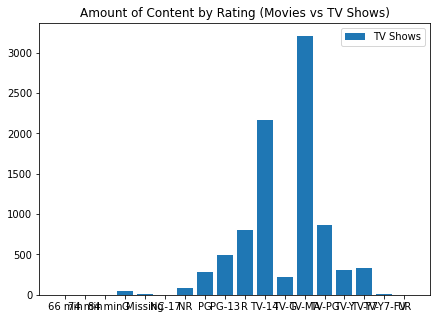

In [41]:
order = df.rating.unique()
count_movies = df.groupby('rating')['title'].count().reset_index()
count_shows = df.groupby('rating')['title'].count().reset_index()
count_shows = count_shows.append([{"rating" : "NC-17", "title" : 0},{"rating" : "PG-13", "title" : 0},{"rating" : "UR", "title" : 0}], ignore_index=True)
count_shows.sort_values(by="rating", ascending=True)
plt.figure(figsize=(7,5))
plt.title('Amount of Content by Rating (Movies vs TV Shows)')
plt.bar(count_movies.rating, count_movies.title)
# plt.bar(count_movies.rating, count_shows.title, bottom=count_movies.title)
plt.legend(['TV Shows', 'Movies'])
plt.show()